In [1]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
import itertools
N = CoordSys3D('N')

s, t, k, d, z = symbols( 's t k d z' )
init_printing(use_unicode=True)

In Brion & Vergne (2007, Lattice Points in Simple Polytopes), the formula for the number of lattice points in a simple, yet non-basic, convex polytope is given. The polytope

$$ \Delta := \text{Conv}\left( (0,0),\, (1,0),\, (0,2) \right) \subseteq \mathbb{R}^{2} $$

is the moment map image for the orbifold $\mathbb{CP}(1,1,2)$.

The vertex $(1,0)$ has orbifold structure group $\mathbb{Z}/2\mathbb{Z}$; the other two have trivial structure groups.

Edge vectors:

$$ \begin{align} \alpha = (0,0) &\rightsquigarrow \begin{cases} \lambda_{\alpha}^{1} &= (1,0), \\ \lambda_{\alpha}^{2} &= (0,1). \end{cases} \\ \alpha = (0,2) &\rightsquigarrow \begin{cases} \lambda_{\alpha}^{1} &= (0,-1), \\ \lambda_{\alpha}^{2} &= (1,-2). \end{cases} \\ \alpha = (1,0) &\rightsquigarrow \begin{cases} \lambda_{\alpha}^{1} &= (-1,2), \\ \lambda_{\alpha}^{2} &= (-1,0). \end{cases} \end{align} $$

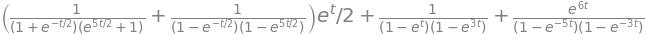

In [2]:
#def Exp(t):
#    return exp( 2*pi*I*t )

def Exp(t):
    return exp( 2*pi*I*t )

def Sum1(t):
    return 1 / ( ( 1 - exp(t) ) * ( 1 - exp(3*t ) ) ) 

def Sum2(t):
    return exp(6*t) / ( ( 1 - exp(-3*t) ) * ( 1 - exp(-5*t) ) )

def Sum3(t):
    return exp(t)*( Rational(1,2) ) * ( 1 / ( ( 1 - exp( Rational(5,2)*t ) ) * ( 1 - exp( Rational(-1,2)*t ) ) )  + 1 / ( ( 1 + exp( Rational(5,2)*t ) ) * ( 1 + exp(Rational(-1,2)*t ) ) ) ) 

def Sum(t):
    return Sum1(t) + Sum2(t) + Sum3(t)

Sum(t)

Expand the sum as a series around $t = 0:$

In [3]:
def SeriesSum(t):
    return series(Sum(t), t, 0)

SeriesSum(t)

In [4]:
def LimitSum(t):
    return limit(Sum(t), t, 0)

LimitSum(t)

Same but for the polytope dilated by an integral factor $k$.

In [6]:
def DilatedSum1(t,k):
    return 1 / ( ( 1 - exp(t) ) * ( 1 - exp(3*t ) ) ) 

def DilatedSum2(t,k):
    return exp(6*k*t) / ( ( 1 - exp(-3*t) ) * ( 1 - exp(-5*t) ) )

def DilatedSum3(t,k):
    return exp(k*t)*( Rational(1,2) ) * ( 1 / ( ( 1 - exp( Rational(5,2)*t ) ) * ( 1 - exp( Rational(-1,2)*t ) ) )  + 1 / ( ( 1 + exp( Rational(5,2)*t ) ) * ( 1 + exp(Rational(-1,2)*t ) ) ) ) 

def DilatedSum(t,k):
    return DilatedSum1(t,k) + DilatedSum2(t,k) + DilatedSum3(t,k)

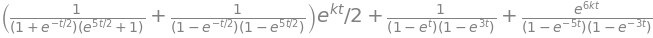

In [7]:
DilatedSum(t,k)

In [8]:
def DilatedSeriesSum(t,k):
    return series(DilatedSum(t,k), t, 0)

DilatedSeriesSum(t,k)

In [9]:
def DilatedLimitSum(k):
    return limit(DilatedSum(t,k), t, 0)

DilatedLimitSum(k)